# Machine Learning: KMeans clustering

In [1]:
student_name = 'Juha-Matti Hellsten'

## KMeans
### Unsupervised learning
In the assignment, three (3) distinct clusters are generated using **synthetic values** of X and y coordinates.

These can be drawn in the (X,Y) coordinate system.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):    
    # Get points that belong to this cluster
    cluster_points = data[cluster_labels == i_centroid]
    
    # Calculate distances from centroid to all points in this cluster
    distances = []
    for point in cluster_points:
        distance = np.sqrt((point[0] - cx)**2 + (point[1] - cy)**2)
        distances.append(distance)
    
    # Return mean distance
    return np.mean(distances) if distances else 0

### Topic: Generation of synthetic data points

Let's generate random data into a NumPy matrix and divide the array into the four (4) cluster of points.
* Each part includes **100** coordinate pairs. 
* The total number of elements in the array is **400 coordinate pairs**.

The points are generated, for example, with NumPy's function `np.random.rand()`.

The four cluster of points is generated with random numbers using the following *calculation formulas*:

* **100** points with (x, y) values between **[-1, 0]**
* **100** points with (x, y) values between **[1, 2]**
* **100** points with (x, y) values between **[3, 4]**
* **100** points with (x, y) values between **[3.5, 4.5]**

In [3]:
# Set random seed for reproducible results
np.random.seed(42)

# Generate 4 clusters of 100 points each

# Cluster 1: 100 points with (x, y) values between [-1, 0]
cluster1 = np.random.uniform(-1, 0, (100, 2))

# Cluster 2: 100 points with (x, y) values between [1, 2]
cluster2 = np.random.uniform(1, 2, (100, 2))

# Cluster 3: 100 points with (x, y) values between [3, 4]
cluster3 = np.random.uniform(3, 4, (100, 2))

# Cluster 4: 100 points with (x, y) values between [3.5, 4.5]
cluster4 = np.random.uniform(3.5, 4.5, (100, 2))

# Combine the values of the generated arrays into a single array
X = np.vstack([cluster1, cluster2, cluster3, cluster4])

# Shuffle the values before the next step
indices = np.random.permutation(len(X))
X = X[indices]

# Print the size of the array
print(f"Length of matrix: {len(X)}")

Length of matrix: 400


### Topic: K-Means clustering and plotting

Perform **clustering** on the dataset using the `cluster` module of `scikit-learn` library
[k-means method](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html).

When using the **KMeans** algorithm, the number of possible clusters can be set in advance, but here the algorithm is run with defaults.

Additional tip you should try in this assignment:

The algorithm of the **KMeans** machine learning model can be tuned in a variety of ways (the same applies to other ML implementations of sklearn) by changing the parameters.

     KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
      random_state=None, tol=0.0001, verbose=0)``

In [4]:
# Create KMeans with default parameters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

# Apply the entire data set
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

Let's find the center points (**centroids**) of the clusters.
Hint: `cluster_centers_`

In [5]:
# Retrieve cluster centers (centroids)

centroids = kmeans.cluster_centers_

# The center points of the clusters and their number are printed out
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 2 and positions: [[0.49831839 0.49006298]
 [3.69654342 3.80290051]]


Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated center points are plotted
Hint: `plt.scatter`

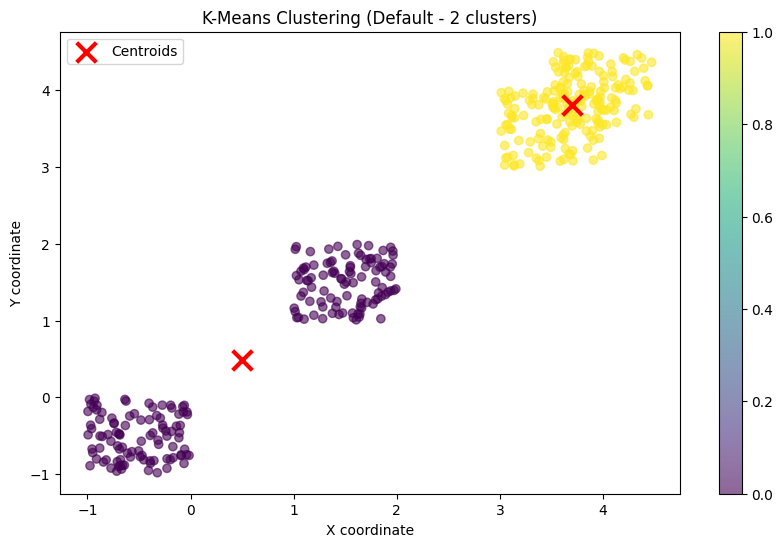

In [6]:
# Plot the points as a scatter plot
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (Default - 2 clusters)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(scatter)

# Plot the calculated centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.show()

### Topic: K-Means clustering - setting the number of cluster centroids

Set the number of cluster centroids to *optimal number* of clusters.
The optimal number of clusters can be seen by examining the distribution of points using the figure.

In [7]:
# Set the optimal number of clusters
# Looking at our data generation, we created 4 distinct regions
# Clusters 3 and 4 overlap (3-4 and 3.5-4.5), so optimal might be 3 or 4
optimal_clusters = 4

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans_optimal.fit(X)

# Retrieving cluster centroids
centroids = kmeans_optimal.cluster_centers_

# The center points of the clusters and their number are printed
print(f"Number of centroids {len(centroids)} and positions: {centroids}")

Number of centroids 4 and positions: [[-0.51895606 -0.51303147]
 [ 3.91264336  4.04152668]
 [ 1.51559283  1.49315744]
 [ 3.42702553  3.5052881 ]]


#### Visualize: Drawing clusters and centroids

Let's plot all the data points using a scatter plot.
* the calculated centroids are plotted
Hint: `plt.scatter`

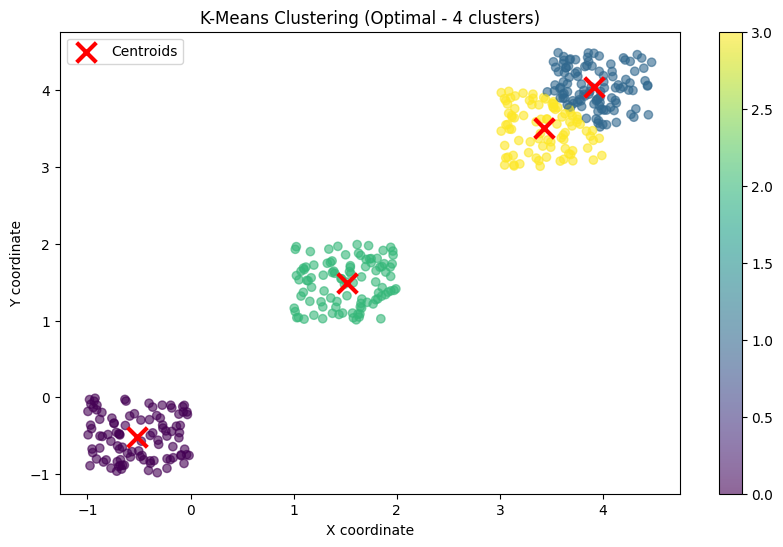

In [8]:
# Plot the points as a scatter plot
labels_optimal = kmeans_optimal.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', alpha=0.6)
plt.title(f'K-Means Clustering (Optimal - {optimal_clusters} clusters)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.colorbar(scatter)

# Plot the calculated centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroids')
plt.legend()
plt.show()

### Topic: Cluster distances as a line diagram

Let's plot the average distances of the points of the clusters from the center of the cluster.
* implement the *k_mean_distance()* function given at the beginning of this document is used for drawing


Average distances from centroids:
Cluster 0: 0.393
Cluster 1: 0.337
Cluster 2: 0.387
Cluster 3: 0.369


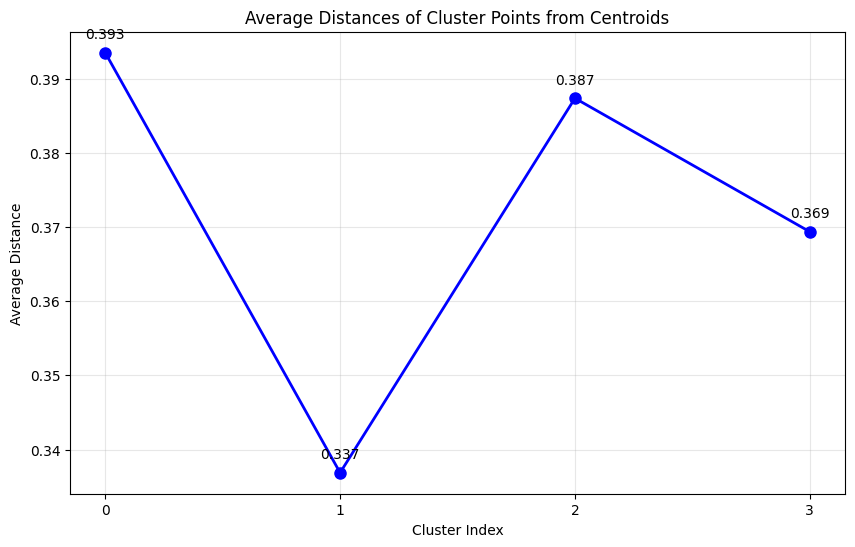

In [9]:
# Calculate and plot the average distances of cluster points from the cluster centroid
distances_from_center = []

# Calculate average distance for each cluster using the k_mean_distance function
for i in range(len(centroids)):
    centroid_x, centroid_y = centroids[i]
    avg_distance = k_mean_distance(X, centroid_x, centroid_y, i, labels_optimal)
    distances_from_center.append(avg_distance)

print("Average distances from centroids:")
for i, distance in enumerate(distances_from_center):
    print(f"Cluster {i}: {distance:.3f}")

# Plot the distances as a line diagram
plt.figure(figsize=(10, 6))
plt.plot(distances_from_center, 'bo-', linewidth=2, markersize=8)
plt.title('Average Distances of Cluster Points from Centroids')
plt.xlabel('Cluster Index')
plt.ylabel('Average Distance')
plt.grid(True, alpha=0.3)
plt.xticks(range(len(distances_from_center)))

# Add value labels on points
for i, distance in enumerate(distances_from_center):
    plt.annotate(f'{distance:.3f}', (i, distance), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()